In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import langevin_cached_model as lcm
import pymc3 as pm

In [2]:
data = pd.read_csv('results/delta10-2/data2/data.csv')

In [3]:
# initial prior
# both D and A have mean 1 and std 10
alpha_A=0.01
beta_A=0.01
alpha_D=2.01
beta_D=1.01

In [4]:
# compile model for reuse
sm = lcm.LangevinIG()
sm.samples=100000

In [5]:
trace = sm.run(x=data,
                aD=alpha_D,
                bD=beta_D,
                aA=alpha_A,
                bA=beta_A,
                delta_t=0.01,
                N=10000)

Applied log-transform to D and added transformed D_log_ to model.
Applied log-transform to A and added transformed A_log_ to model.
 [-------100%-------] 100000 of 100000 in 168.4 sec. | SPS: 593.9 | ETA: 0.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126513240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x126661a90>]], dtype=object)

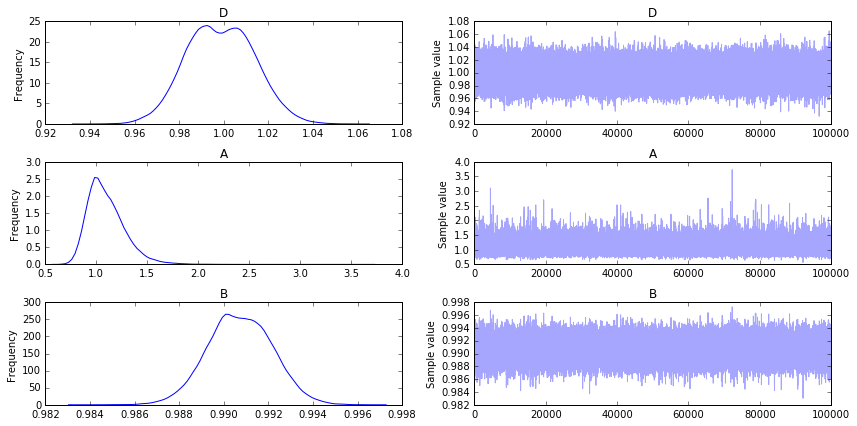

In [6]:
pm.traceplot(trace)

In [7]:
pm.summary(trace)


D:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.999            0.015            0.000            [0.970, 1.028]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.970          0.988          0.998          1.009          1.028


A:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  1.100            0.185            0.001            [0.792, 1.468]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.824          0.969          1.070          1.202          1.533


B:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------